## Predicting Bike Rentals with Machine Learning ##

This case study is about a bike rental shop. The bike rental company wants to predict the demand of bikes at any given hour of the day, so that, they can arrange for sufficient number of bike for the customers. They have shared 
the hourly rental data for last two years.

#### The Task ####
Create a machine learning model which can predict the count of bikes rented at any given hour of the day.

#### The Flow ####
The flow of the case study is as below:

- Reading the data
- Identifying the Target variable
- Looking at the distribution of Target variable
- Basic Data exploration
- Rejecting useless columns
- Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
- Feature Selection based on data distribution
- Outlier treatment
- Missing Values treatment
- Visual correlation analysis
- Statistical correlation analysis (Feature Selection)
- Converting data to numeric for ML
- Sampling and K-fold cross validation
- Trying multiple Regression algorithms
- Selecting the best Model
- Deploying the best model in production

#### Data description ####

- **season**: The current season (1:winter, 2:spring, 3:summer, 4:fall)
- **yr**: year (0: 2011, 1:2012)
- **mnth**: month ( 1 to 12)
- **hr**: hour of the day (0 to 23)
- **holiday**: weather day is holiday or not
- **weekday**: day of the week
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0
- **weathersit**: The Weather forecast for the day
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: Normalized temperature in Celsius.
- **atemp**: Normalized feeling temperature in Celsius.
- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered

#### Reading the Data ####

In [1]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# reading the dataset
import pandas as pd
import numpy as np
bike_rentals = pd.read_csv('BikeRentalData.csv')
bike_rentals_rows_before = bike_rentals.shape[0]

# removing duplicates
bike_rentals = bike_rentals.drop_duplicates()
bike_rentals_rows_after = bike_rentals.shape[0]
print("number of duplicate values deleted: ", bike_rentals_rows_before - bike_rentals_rows_after)

# showing head rows
bike_rentals.head()

number of duplicate values deleted:  2


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


In [2]:
# data shape
bike_rentals.shape

(17377, 14)

#### Identifying the Target Variable and Predictors ####

**Target variable**: count of total rental bikes (cnt).

**Predictors**: further analysis required.

#### Looking at the Distribution of Target Variable ####

If target variable's distribution is too skewed then the predictive modeling will not be possible.

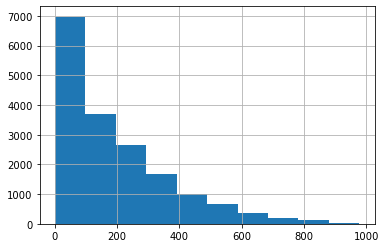

In [3]:
import matplotlib.pyplot as plt
bike_rentals['cnt'].hist()
plt.show()

There are sufficient number of rows for every value, so the distribution is fine.

#### Basic Data Exploration ####

In [4]:
# summary of the data, data types, missing values
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17377 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17377 non-null  int64  
 1   yr          17377 non-null  int64  
 2   mnth        17377 non-null  int64  
 3   hr          17377 non-null  int64  
 4   holiday     17377 non-null  int64  
 5   weekday     17377 non-null  int64  
 6   workingday  17377 non-null  int64  
 7   weathersit  17377 non-null  int64  
 8   temp        17377 non-null  float64
 9   atemp       17377 non-null  float64
 10  hum         17377 non-null  float64
 11  windspeed   17377 non-null  float64
 12  registered  17377 non-null  int64  
 13  cnt         17377 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 2.0 MB


In [5]:
# confirming there are no missing values in the data set
bike_rentals.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
cnt           0
dtype: int64

In [6]:
# descriptive statistic of the data
bike_rentals.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
count,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000,17377.000000
mean,2.501525,0.502561,6.537435,11.547505,0.028774,3.003568,0.682742,1.425332,0.496993,0.475780,0.627216,0.190108,153.803649,189.483916
std,1.106917,0.500008,3.438722,6.914438,0.167175,2.005744,0.465422,0.639377,0.192553,0.171849,0.192935,0.122343,151.357913,181.387645
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,886.000000,977.000000


In [7]:
# unique values for each column
bike_rentals.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
registered    776
cnt           869
dtype: int64

According to the statistics above, we can now discern the type of data for each column.

**Continuous data**: temp, atemp, hum, windspeed, registered

**Categorical data**: season, mnth, hr, holiday, weekday, workingday, weathersit

Data in 'yr' column is useless - it has an ID type of quality (0 stands for 2011 and 1 for 2012) - so it will be excluded from the dataset.

In [8]:
# removing useless data
bike_rentals.drop(['yr'], axis=1, inplace=True)

In [9]:
bike_rentals.head()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1


#### Visual Exploratory Data Analysis ####

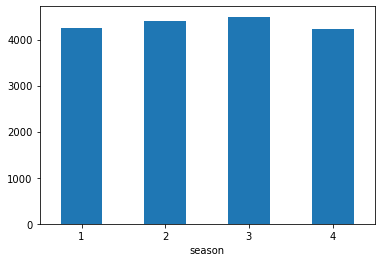

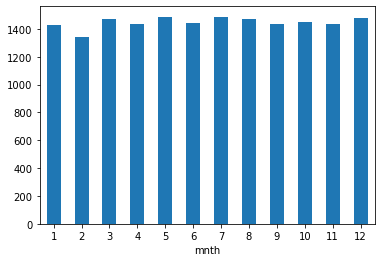

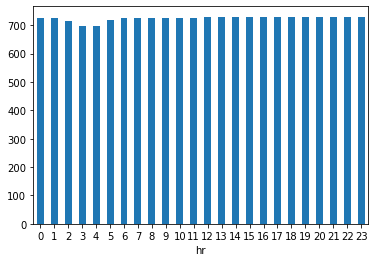

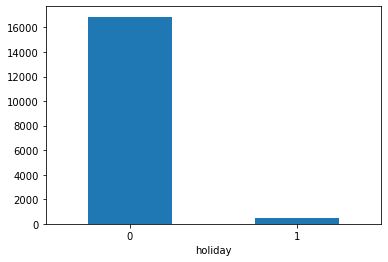

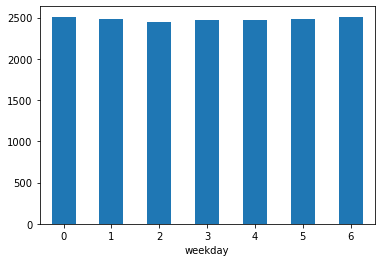

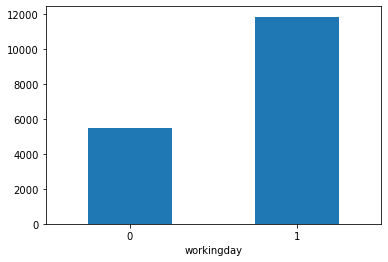

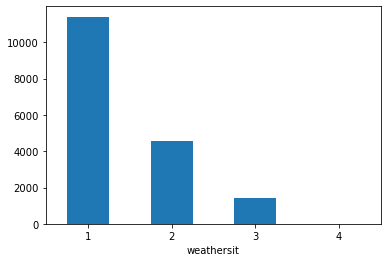

In [10]:
# inspecting distribution of data in categorical columns
for column in ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']:
    plt.figure(figsize=(6,4))
    bike_rentals.groupby(column).size().plot(kind='bar')
    plt.xticks(rotation=0)
    plt.show()

**Interpretation:**
The charts above show the distribution of values in each categorical column. Every categorical value has its own distribution, or number of rows in which they appear (e.g. in the season column there are over 4000 rows in which category 1 appear).

There is a well spread distribution for all the values in all of the charts above, except for category 1 in **holiday** column. Here we have a very skewed graph.

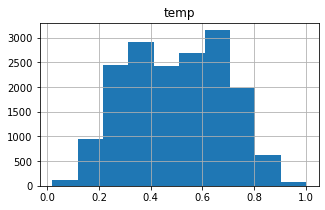

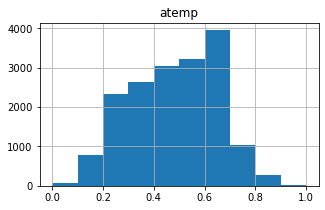

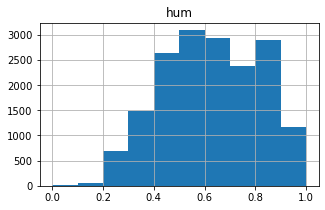

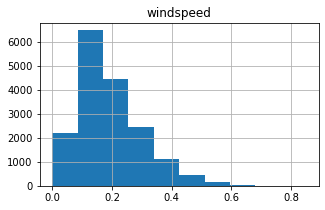

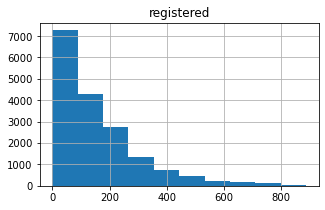

In [11]:
# inspecting distribution of data in categorical columns
for column in ['temp', 'atemp', 'hum', 'windspeed', 'registered']:
    plt.figure(figsize=(5,3))
    bike_rentals[column].hist()
    plt.title(column)
    plt.show()

The distribution of values in these columns are well spread.

#### Feature Selection ####

We will choose feature columns according to correlation between each predictor and the target variable.

The correlations will be examined visually and by the means of statistical measurements:
- continuous predictors (temp, atemp, hum, windspeed, registered) Vs. continuous target variable (cnt) - scatter charts and correlation matrix
- categorical predictors (season, mnth, hr, holiday, weekday, workingday, wheathersit) Vs. continuous target variable (cnt) -  boxplots and ANoVa

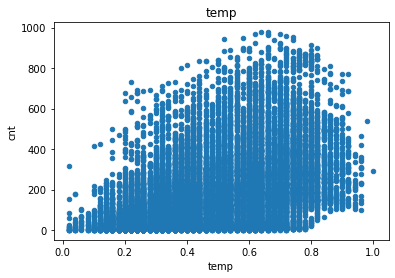

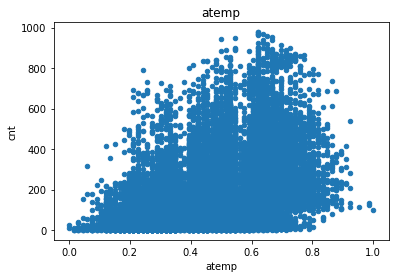

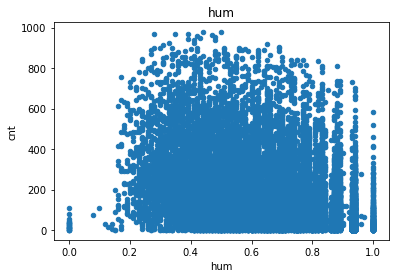

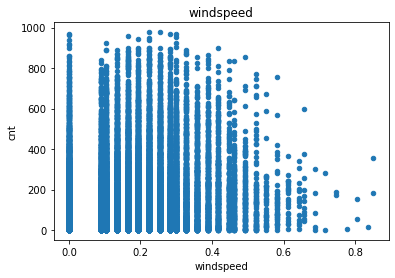

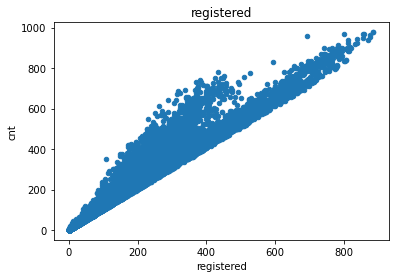

In [12]:
# relationship exploration with scatter charts
for column in ['temp', 'atemp', 'hum', 'windspeed', 'registered']:
    bike_rentals.plot.scatter(x=column, y='cnt')
    plt.title(column)
    plt.show()

In [13]:
# relationship exploration with correlation matrix
bike_rentals[['cnt', 'temp', 'atemp', 'hum', 'windspeed', 'registered']].corr()

,cnt,temp,atemp,hum,windspeed,registered
cnt,1.000000,0.404798,0.400950,-0.322872,0.093155,0.972148
temp,0.404798,1.000000,0.987671,-0.069931,-0.023141,0.335377
atemp,0.400950,0.987671,1.000000,-0.051960,-0.062357,0.332571
hum,-0.322872,-0.069931,-0.051960,1.000000,-0.290070,-0.273891
windspeed,0.093155,-0.023141,-0.062357,-0.290070,1.000000,0.082244
registered,0.972148,0.335377,0.332571,-0.273891,0.082244,1.000000


**Interpretation:**
We can clearly see the correlation between 'registered' column and target column, both visually and by the number (corr=0.97). Other columns are not correlated with 'cnt'.

Final selection from the continuous columns: **registered**.

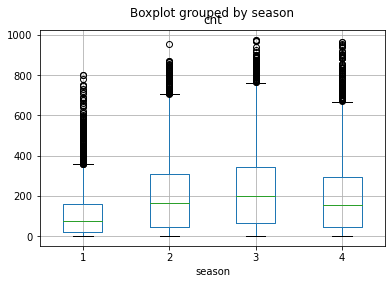

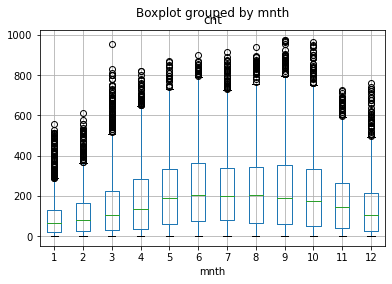

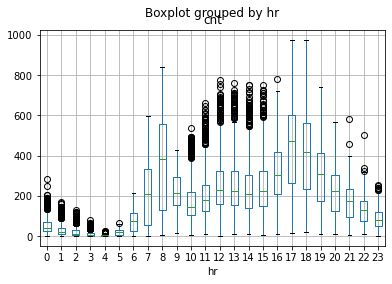

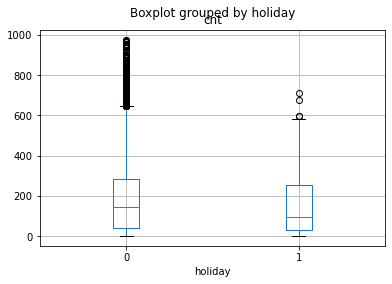

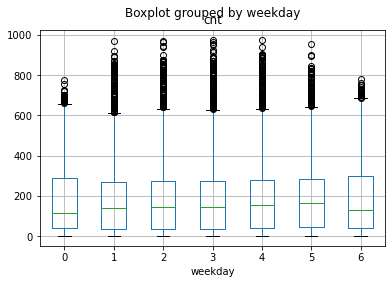

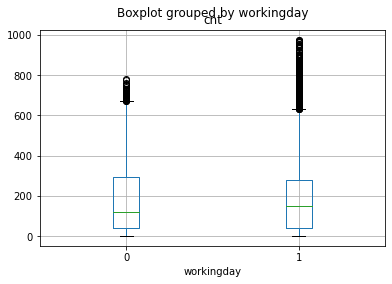

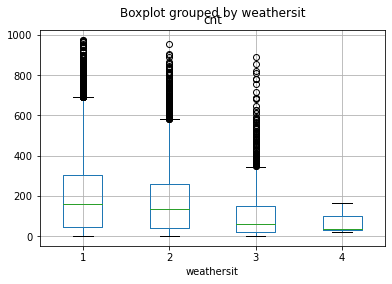

In [14]:
# relationship exploration with box plots
for col in ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']:
    bike_rentals.boxplot(by=col, column='cnt', vert=True)
    plt.show()

**Interpretation:** The distribution seems to be different for each category (the boxes are not in same line). In this data, all the categorical predictors looks correlated with the Target variable.

In [15]:
# relationship exploration with ANoVA (Analysis of Variance)
def anova_function(data, target_var, predictors):
    from scipy.stats import f_oneway
    '''
    Function for the one-way ANOVA tests the null hypothesis (H0)
    that two or more groups have the same population mean.
    '''
    selected_predictors = [] # list of predictors that are correlated with target variable
    for predictor in predictors:
        grouped_list = data.groupby(predictor)[target_var].apply(list)
        anova_res = f_oneway(*grouped_list)
        
        # if calculated P-value is smaller than 0.05, we reject hypothesis (H0) that there is no correlation between a predictor and the target variable
        if anova_res[1] < 0.05:
            print(f"'{predictor}' is correlated with the target variable; P-value: {anova_res[1]}")
            selected_predictors.append(predictor)
        else:
            print(f"{predictor} is not correlated with the target variable;, P-value: {anov_res[1]}")
            
    return selected_predictors

In [16]:
anova_function(bike_rentals, 'cnt', ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'])

'season' is correlated with the target variable; P-value: 5.106220835895279e-257
'mnth' is correlated with the target variable; P-value: 5.2484657372432516e-284
'hr' is correlated with the target variable; P-value: 0.0
'holiday' is correlated with the target variable; P-value: 4.495359698010671e-05
'weekday' is correlated with the target variable; P-value: 0.0018766923121991564
'workingday' is correlated with the target variable; P-value: 6.675147740900618e-05
'weathersit' is correlated with the target variable; P-value: 1.4485803474430875e-81


['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

**Interpretation:** the ANoVA test corroborated the box plot analysis and confirmed that the predictors 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday' and 'weathersit' are correlated with the target variable.

In [17]:
# selecting final predictors for machine learning model
predictors = ['registered', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
ml_data = bike_rentals[predictors]

ml_data.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit
0,13,1,1,0,0,6,0,1
1,32,1,1,1,0,6,0,1
2,27,1,1,2,0,6,0,1
3,10,1,1,3,0,6,0,1
4,1,1,1,4,0,6,0,1


In [18]:
# saving the final ml_data for reference during deployment
ml_data.to_pickle('ml_data.pkl')

In [19]:
# final dataset ready to implement machine learning
ml_data_numeric = pd.get_dummies(ml_data)
ml_data_numeric['cnt'] = bike_rentals['cnt']
ml_data_numeric.head()

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,13,1,1,0,0,6,0,1,16
1,32,1,1,1,0,6,0,1,40
2,27,1,1,2,0,6,0,1,32
3,10,1,1,3,0,6,0,1,13
4,1,1,1,4,0,6,0,1,1


#### Machine Learning: Splitting Data into Training and Testing Sample Sets ####

- 70% od data goes to Train dataset - this dataset is used to train ML model
- the remainder becomes Test dataset - for testing how good the model is

In [20]:
from sklearn.model_selection import train_test_split

target = ['cnt']
predictors = ['registered', 'season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

X = ml_data_numeric[predictors].values
y = ml_data_numeric[target].values

# splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [21]:
# standardization/normalization of the dataset (this step required for KNN)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# instantiating either Standard or MinMax scaler
predictor_scaler = MinMaxScaler()

# storing the fit object and generating the standardized values of X
X = predictor_scaler.fit(X).transform(X)

# splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print(X_train.shape, "\n", y_train.shape)
print(X_test.shape, "\n", y_test.shape)

(12163, 8) 
 (12163, 1)
(5214, 8) 
 (5214, 1)


#### Linear Regression Models: Implementation Steps ####

**1) Modelling**

    - importing model and error metrics
    - instantiating the DecisionTreeRegressor class
    - fitting the model
    - measuring and printing the accuracy on train data set

**2) Inspecting sample prediction values**

    - creating test dataframe with all the predictors and assigning them X_test values
    - adding target column with y_test values
    - adding prediction column with test_prediction values
    - printing only target column and prediction column

**3) Calculating accuracy**

    - creating custom mean_accuracy function to calculate test data mean accuracy based on either absolute percent error (APE) or root mean square error (RMSE)
    - printing test data mean_accuracy
    - creating custom scoring based on mean_accuracy function
    - performing 10-fold cross validation using custom scoring and printing results

**4) Plotting the feature importance for Top 10 most important columns**

#### Linear Regression Model ####

In [23]:
# importing model and error metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# instantiating the LinearRegression class
lr = LinearRegression()

# fitting the model
lr_fit = lr.fit(X_train, y_train)
train_prediction = lr_fit.predict(X_train)
test_prediction = lr_fit.predict(X_test)

# measuring and printing the accuracy on train data set
train_r2 = r2_score(y_train, train_prediction)
print(f"Train data set accuracy: {train_r2}")

Train data set accuracy: 0.956816330876403


In [24]:
# creating dataframe with all the predictors and assigning them X_test values
data_res = pd.DataFrame(data=X_test, columns=predictors)
data_res

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit
0,0.340858,0.666667,0.545455,0.391304,0.0,0.333333,1.0,0.000000
1,0.731377,0.333333,0.363636,0.739130,0.0,0.666667,1.0,0.000000
2,0.170429,0.000000,0.181818,1.000000,0.0,1.000000,0.0,0.000000
3,0.515801,0.333333,0.363636,0.826087,0.0,0.333333,1.0,0.000000
4,0.009029,0.000000,0.000000,0.000000,0.0,0.666667,1.0,0.000000
...,...,...,...,...,...,...,...,...
5209,0.121896,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.333333
5210,0.308126,1.000000,1.000000,0.521739,0.0,0.333333,1.0,0.000000
5211,0.371332,0.666667,0.454545,0.521739,0.0,0.000000,0.0,0.000000
5212,0.160271,0.000000,0.181818,0.652174,0.0,0.333333,1.0,0.000000


In [25]:
# adding target column with y_test values
data_res[target] = y_test
data_res

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt
0,0.340858,0.666667,0.545455,0.391304,0.0,0.333333,1.0,0.000000,333
1,0.731377,0.333333,0.363636,0.739130,0.0,0.666667,1.0,0.000000,732
2,0.170429,0.000000,0.181818,1.000000,0.0,1.000000,0.0,0.000000,185
3,0.515801,0.333333,0.363636,0.826087,0.0,0.333333,1.0,0.000000,526
4,0.009029,0.000000,0.000000,0.000000,0.0,0.666667,1.0,0.000000,13
...,...,...,...,...,...,...,...,...,...
5209,0.121896,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.333333,117
5210,0.308126,1.000000,1.000000,0.521739,0.0,0.333333,1.0,0.000000,312
5211,0.371332,0.666667,0.454545,0.521739,0.0,0.000000,0.0,0.000000,556
5212,0.160271,0.000000,0.181818,0.652174,0.0,0.333333,1.0,0.000000,166


In [26]:
# adding prediction column with test_prediction values
data_res['prediction'] = np.round(test_prediction)
data_res

,registered,season,mnth,hr,holiday,weekday,workingday,weathersit,cnt,prediction
0,0.340858,0.666667,0.545455,0.391304,0.0,0.333333,1.0,0.000000,333,350.0
1,0.731377,0.333333,0.363636,0.739130,0.0,0.666667,1.0,0.000000,732,758.0
2,0.170429,0.000000,0.181818,1.000000,0.0,1.000000,0.0,0.000000,185,227.0
3,0.515801,0.333333,0.363636,0.826087,0.0,0.333333,1.0,0.000000,526,536.0
4,0.009029,0.000000,0.000000,0.000000,0.0,0.666667,1.0,0.000000,13,1.0
...,...,...,...,...,...,...,...,...,...,...
5209,0.121896,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.333333,117,150.0
5210,0.308126,1.000000,1.000000,0.521739,0.0,0.333333,1.0,0.000000,312,318.0
5211,0.371332,0.666667,0.454545,0.521739,0.0,0.000000,0.0,0.000000,556,424.0
5212,0.160271,0.000000,0.181818,0.652174,0.0,0.333333,1.0,0.000000,166,165.0


In [27]:
# printing only target column and prediction column
print(data_res[['cnt', 'prediction']].head())

   cnt  prediction
0  333       350.0
1  732       758.0
2  185       227.0
3  526       536.0
4   13         1.0


In [28]:
# custom function to calculate mean accuracy based on absolute percent error
def mean_accuracy(y, y_pred):
    APE = 100 * (abs((y - y_pred) / y))
    return 100 - np.mean(APE)

# custom function to calculate median accuracy based on absolute percent error
def median_accuracy(y, y_pred):
    APE = 100 * (abs((y - y_pred) / y))
    return 100 - np.median(APE)

In [29]:
print(f"Test data mean accuracy: {mean_accuracy(data_res['cnt'], data_res['prediction'])}")
print(f"Test data median accuracy: {median_accuracy(data_res['cnt'], data_res['prediction'])}")

Test data mean accuracy: 28.75463148673755
Test data median accuracy: 85.97389248638092


In [30]:
# custom scoring based on mean_accuracy function
from sklearn.metrics import make_scorer
custom_scoring = make_scorer(mean_accuracy, greater_is_better=True)

In [31]:
# performing 10-fold cross validation using custom scoring and printing results
from sklearn.model_selection import cross_val_score
accuracy_vals = cross_val_score(lr, X, y, cv=10, scoring=custom_scoring)
print(f"10-fold cross validation accuracy values:\n{accuracy_vals}")
print(f"\nAVG. ACC. SCORE OF THE MODEL (using MAPE): {round(np.mean(accuracy_vals), 2)}")

10-fold cross validation accuracy values:
[-74.07929873  26.65796421  59.00921878  49.87501303  14.90766055
  13.94538914  48.55944791  69.51846121  69.73312601  39.90684357]

AVG. ACC. SCORE OF THE MODEL (using MAPE): 31.8


In [32]:
# using RMSE metrics instead of MAPE
def rmse_accuracy(y, y_pred):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y, y_pred)
    return (100 - np.sqrt(mse))

print(f"Test data RMSE accuracy: {rmse_accuracy(data_res['cnt'], data_res['prediction'])}")

rmse_scoring = make_scorer(rmse_accuracy, greater_is_better=True)
rmse_accuracy_vals = cross_val_score(lr, X, y, cv=10, scoring=rmse_scoring)
print(f"AVG. ACC. SCORE OF THE MODEL (using RMSE): {np.mean(rmse_accuracy_vals)}")

Test data RMSE accuracy: 63.63171059689265
AVG. ACC. SCORE OF THE MODEL (using RMSE): 61.93549808894731


#### KNN (K-Nearest Neighbor) ####

In [33]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=2)

model_fit = model.fit(X_train, y_train)
train_prediction = model_fit.predict(X_train)
test_prediction = model_fit.predict(X_test)

train_r2 = r2_score(y_train, train_prediction)
print(f"Train data R2 value: {train_r2}")

data_sample = pd.DataFrame(data=X_test, columns=predictors)
data_sample[target] = y_test
data_sample['prediction'] = test_prediction
print(f"\n{data_sample[['cnt', 'prediction']].head()}")

def rmse_accuracy(y, y_pred):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y, y_pred)
    return (100 - (np.sqrt(mse)))
print(f"\nTest data RMSE accuracy: {rmse_accuracy(data_sample['cnt'], data_sample['prediction'])}")

from sklearn.metrics import make_scorer
custom_scoring = make_scorer(rmse_accuracy, greater_is_better=True)

from sklearn.model_selection import cross_val_score
accuracy_vals = cross_val_score(model, X, y, cv=10, scoring=custom_scoring)
print(f"\n10-fold cross validation accuracy values:\n{accuracy_vals}")
print(f"\nFINAL AVG. ACC. SCORE OF THE MODEL: {round(np.mean(accuracy_vals), 2)}")

Train data R2 value: 0.9894019921648664

   cnt  prediction
0  333       335.0
1  732       751.0
2  185       172.5
3  526       499.5
4   13         9.0

Test data RMSE accuracy: 68.02619323351104

10-fold cross validation accuracy values:
[58.20862372 35.40522881 56.12061627 56.89534573 56.1498393  36.58333554
 36.57371217 53.29348481 45.73869434 51.00905791]

FINAL AVG. ACC. SCORE OF THE MODEL: 48.6


#### Decision Tree ####

In [34]:
# function reg_alg()
def reg_alg():
    model_fit = model.fit(X_train, y_train)
    train_prediction = model_fit.predict(X_train)
    test_prediction = model_fit.predict(X_test)

    train_r2 = r2_score(y_train, train_prediction)
    print(f"Train data R2 value: {train_r2}")

    data_sample = pd.DataFrame(data=X_test, columns=predictors)
    data_sample[target] = y_test
    data_sample['prediction'] = test_prediction
    print(f"\n{data_sample[['cnt', 'prediction']].head()}")

    def rmse_accuracy(y, y_pred):
        from sklearn.metrics import mean_squared_error
        mse = mean_squared_error(y, y_pred)
        return (100 - (np.sqrt(mse)))
    print(f"\nTest data RMSE accuracy: {rmse_accuracy(data_sample['cnt'], data_sample['prediction'])}")

    from sklearn.metrics import make_scorer
    custom_scoring = make_scorer(rmse_accuracy, greater_is_better=True)

    from sklearn.model_selection import cross_val_score
    accuracy_vals = cross_val_score(model, X, y, cv=10, scoring=custom_scoring)
    print(f"\n10-fold cross validation accuracy values:\n{accuracy_vals}")
    print(f"\nFINAL AVG. ACC. SCORE OF THE MODEL: {round(np.mean(accuracy_vals), 2)}")
    
    plt.figure(figsize=(8,6))
    feature_importances = pd.Series(model.feature_importances_, index=predictors)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.show()
    
    return

Train data R2 value: 0.9860203506963103

   cnt  prediction
0  333  322.101449
1  732  731.263158
2  185  240.027211
3  526  506.387097
4   13    9.666667

Test data RMSE accuracy: 76.42324628186502

10-fold cross validation accuracy values:
[87.29210493 76.27855145 76.61237806 73.91485422 75.19314011 65.33810634
 65.34226158 71.35310337 63.7549826  65.16157992]

FINAL AVG. ACC. SCORE OF THE MODEL: 72.02


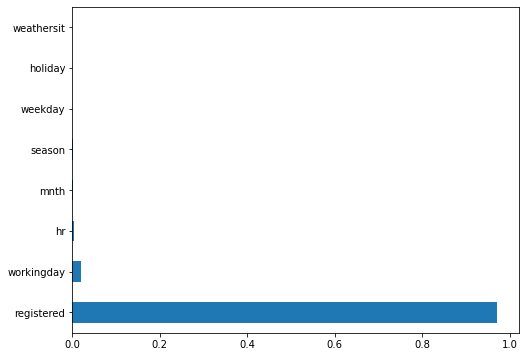

In [35]:
# implementing the reg_alg function
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=8)

reg_alg()

#### Random Forest ####

Train data R2 value: 0.9929800739345438

   cnt  prediction
0  333  340.400849
1  732  735.826123
2  185  216.082629
3  526  516.737605
4   13    9.828950

Test data RMSE accuracy: 81.44012013434727

10-fold cross validation accuracy values:
[89.3694265  79.54167742 80.33057965 78.23121285 80.93869256 65.31878624
 70.31187421 77.00207189 73.89033893 71.15508716]

FINAL AVG. ACC. SCORE OF THE MODEL: 76.61


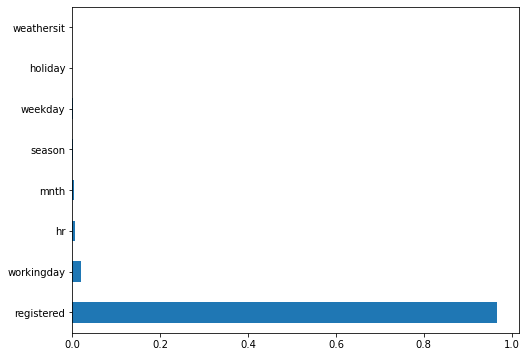

In [36]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

reg_alg()

#### AdaBoost Regressor (Adaptive Boosting) ####

Train data R2 value: 0.9947301155027667

   cnt  prediction
0  333  340.846154
1  732  739.409091
2  185  215.916667
3  526  510.551020
4   13    9.400000

Test data RMSE accuracy: 81.72009931748028

10-fold cross validation accuracy values:
[89.39146539 79.56912558 80.30819884 78.09139117 80.42098008 62.9240438
 70.70556298 77.19167499 73.86604785 70.07128533]

FINAL AVG. ACC. SCORE OF THE MODEL: 76.25


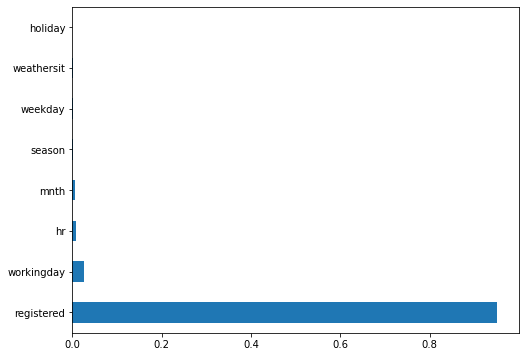

In [37]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=10)
model = AdaBoostRegressor(n_estimators=100, base_estimator=dtr, learning_rate=0.04)

reg_alg()

#### XGBoost (Extreme Gradient Boosting) ####

Train data R2 value: 0.998326878422417

   cnt  prediction
0  333  341.141541
1  732  736.236633
2  185  202.387817
3  526  510.625946
4   13    8.931381

Test data RMSE accuracy: 83.1478898230626

10-fold cross validation accuracy values:
[90.14059925 79.74835923 79.76832317 79.82902039 82.83284549 66.35488988
 71.22734829 76.82540507 77.32845244 74.09739451]

FINAL AVG. ACC. SCORE OF THE MODEL: 77.82


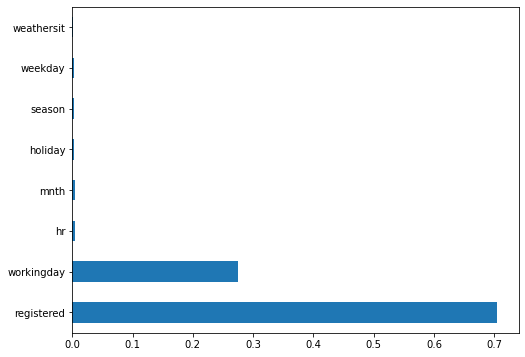

In [38]:
from xgboost import XGBRegressor
model = XGBRegressor(max_depth=10, learning_rate=0.1, n_estimators=100, objective='reg:squarederror', booster='gbtree')

reg_alg()

#### Selecting the Best Model

According to the result above, the best model to choose is XGBoost with average accuracy of 77.82. This will be the algorithm of choice for predictive modelling the task in hand.

Before deployment, we shall first choose only the most important predictors. Reducing the number of predictors helps make the model more stable. Based on feature importance graphs, we can choose **'registered'**, **'workingday'**, **'hr'** and **'mnth'** as our final predictors.


In [39]:
# reducing the number of predictors
target = ['cnt']
predictors = ['registered', 'workingday', 'hr', 'mnth']

# train/test datasets
X = bike_rentals[predictors].values
y = bike_rentals[target].values

# standardization of X
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X = mm_scaler.fit(X).transform(X)

print(X.shape)
print(y.shape)

(17377, 4)
(17377, 1)


In [40]:
# accuracy measurement with cross validation
from sklearn.model_selection import cross_val_score
model = XGBRegressor(max_depth=10,
                     learning_rate=0.1,
                     n_estimators=100,
                     objective='reg:squarederror',
                     booster='gbtree')

# 10-fold cross validation
accuracy_vals = cross_val_score(model, X, y, cv=10, scoring=custom_scoring)
print(f"10-fold cross validation accuracy values: {accuracy_vals}")
print(f"\nFINAL AVG. ACC. SCORE: {round(np.mean(accuracy_vals),2)}")

10-fold cross validation accuracy values: [90.11169774 78.43944604 79.74942087 77.66210464 81.62283657 71.08149569
 69.29107291 76.1605123  73.76161988 74.21082902]

FINAL AVG. ACC. SCORE: 77.21


#### Saving the Model



In [41]:
# retraining the model
final_model = model.fit(X,y)

# saving the model
import pickle
import os

with open('final_model.pkl', 'wb') as file_write_stream:
    pickle.dump(final_model, file_write_stream)
    file_write_stream.close()
    
print("Model file saved at", os.getcwd())

Model file saved at C:\Users\OK Computer\jupyter_notebooks\PROJECTS\5_MACHINE_LEARNING_INTRODUCTION (3)\03 - Predicting Bike Rentals (Decision Trees)\TN
